## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [ ]:
import pandas as pd

In [ ]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 154MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 202MB/s]


Посмотрим на таблицу `Ratings`.

In [ ]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

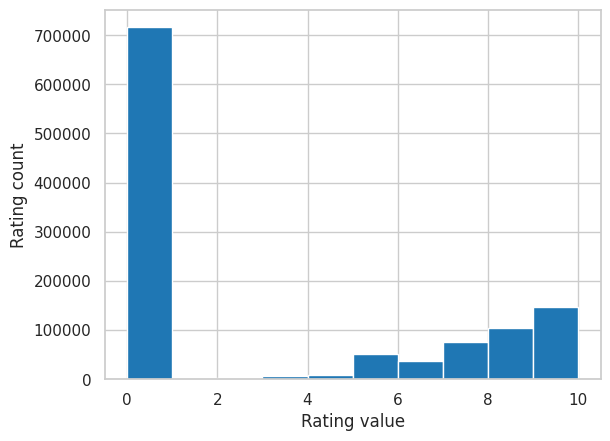

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [ ]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-26-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [ ]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [ ]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [ ]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

# Написание функций для обучения SVD и линейной регрессии

In [ ]:
!pip install surprise

In [ ]:
import pandas as pd
import pickle

from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

def ratings_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['Book-Rating'] != 0]
    book_counts = df['ISBN'].value_counts()
    user_counts = df['User-ID'].value_counts()
    valid_books = book_counts[book_counts > 1].index
    valid_users = user_counts[user_counts > 1].index
    df = df[df['ISBN'].isin(valid_books) & df['User-ID'].isin(valid_users)]

    return df

def modeling(ratings: pd.DataFrame) -> None:
    # Шаг 1: разбиение данных на тренировочную и тестовую выборки
    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(ratings, reader)

    # Шаг 2: Настройка параметров для GridSearchCV
    param_grid = {
        'n_factors': [50, 100],
        'n_epochs': [20, 30],
        'lr_all': [0.005, 0.01],
        'reg_all': [0.02, 0.1]
    }

    gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=3)
    gs.fit(data)

    best_params = gs.best_params['mae']
    best_mae = gs.best_score['mae']
    print(f'Лучшие параметры: {best_params}')
    print(f'Лучший MAE: {best_mae}')

    # Шаг 3: обучение модели с лучшими параметрами
    best_svd = gs.best_estimator['mae']
    trainset, testset = train_test_split(data, test_size=0.2)
    best_svd.fit(trainset)

    # Шаг 4: тестирование модели и вывод метрик
    predictions = best_svd.test(testset)
    mae = accuracy.mae(predictions)

    # Шаг 5: сохранение модели
    with open("svd.pkl", "wb") as file:
        pickle.dump(best_svd, file)

In [ ]:
modeling(ratings_preprocessing(ratings))

Лучшие параметры: {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
Лучший MAE: 1.2500881576724086
MAE:  1.2426


In [ ]:
import pickle
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

nltk.download("stopwords")
nltk.download("punkt")

def books_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df.dropna(subset=['Book-Author', 'Publisher'], inplace=True)
    df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')
    current_year = pd.Timestamp.now().year
    df = df[df['Year-Of-Publication'].notna() & (df['Year-Of-Publication'] <= current_year)]
    df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

    return df

def ratings_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['Book-Rating'] != 0]
    book_counts = df['ISBN'].value_counts()
    user_counts = df['User-ID'].value_counts()
    valid_books = book_counts[book_counts > 1].index
    valid_users = user_counts[user_counts > 1].index
    df = df[df['ISBN'].isin(valid_books) & df['User-ID'].isin(valid_users)]

    # Группировка по ISBN и вычисление среднего рейтинга и количества оценок
    ratings_summary = df.groupby('ISBN').agg({'Book-Rating': ['mean', 'count']}).reset_index()
    ratings_summary.columns = ['ISBN', 'Average-Rating', 'Rating-Count']

    return ratings_summary

def title_preprocessing(text: str) -> str:
    # Токенизация
    tokens = nltk.word_tokenize(text)

    # Удаление стоп-слов и пунктуации
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]

    # Возвращение текста без стоп-слов и пунктуации
    return ' '.join(tokens)

def modeling(books: pd.DataFrame, ratings: pd.DataFrame) -> None:
    # Объединение данных о книгах и их рейтингах
    merged_data = pd.merge(books, ratings, on='ISBN', how='inner')

    # Предобработка названий книг и их векторизация
    merged_data['Processed-Title'] = merged_data['Book-Title'].apply(title_preprocessing)
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    X_titles = tfidf_vectorizer.fit_transform(merged_data['Processed-Title']).toarray()

    # Кодирование категориальных признаков (автор, издатель, год)
    categorical_features = merged_data[['Book-Author', 'Publisher', 'Year-Of-Publication']]
    categorical_encoded = pd.DataFrame({col: pd.factorize(categorical_features[col])[0] for col in categorical_features})

    # Объединение всех признаков
    features = pd.concat([categorical_encoded, pd.DataFrame(X_titles)], axis=1)
    features.columns = features.columns.astype(str)

    # Нормализуем значения
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    # Создание DataFrame с числовыми названиями признаков
    feature_names = [str(i) for i in range(X.shape[1])]
    X_df = pd.DataFrame(X, columns=feature_names)

    y = merged_data['Average-Rating']

    # Разбиение данных на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

    # Обучение SGDRegressor
    linreg = SGDRegressor()
    linreg.fit(X_train, y_train)

    # Тестирование модели и вывод метрик
    y_pred = linreg.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae}')

    # Сохранение модели
    with open("linreg.pkl", "wb") as file:
        pickle.dump(linreg, file)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
modeling(books_preprocessing(books), ratings_preprocessing(ratings))

MAE: 1.0392729489489214


In [ ]:
import unittest

class RecsTestCase(unittest.TestCase):
    def test_svd_recs(self):
        with open('svd.pkl', 'rb') as f:
            loaded_svd = pickle.load(f)
        td = pd.read_csv("/svd_test.csv")
        predictions = loaded_svd.test(td.values)
        mae = accuracy.mae(predictions)
        self.assertLessEqual(mae, 1.3)

    def test_linreg_recs(self):
        with open('linreg.pkl', 'rb') as f:
            loaded_linreg = pickle.load(f)
        td = pd.read_csv("/linreg_test.csv")
        y = td.pop("y")
        predictions = loaded_linreg.predict(td)
        mae = mean_absolute_error(y, predictions)
        self.assertLessEqual(mae, 1.5)

In [ ]:
tests = RecsTestCase()
tests.test_svd_recs()

MAE:  1.4517


AssertionError: 1.4517061428824687 not less than or equal to 1.3

In [ ]:
tests.test_linreg_recs()

# Внесение изменений для сравнения метрики MAE для второй части задания при иной обработке DataFrame Books

In [ ]:
import pickle
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

nltk.download("stopwords")
nltk.download("punkt")

def books_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])
    missing_rows = books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]
    for index, row in missing_rows.iterrows():
          parts = row['Book-Title'].split(';')
          books.at[index, 'Publisher'] = row['Year-Of-Publication']
          books.at[index, 'Year-Of-Publication'] = row['Book-Author']
          if len(parts) > 1:
            books.at[index, 'Book-Author'] = parts[-1]
          else:
            books.at[index, 'Book-Author'] = None
    current_year = pd.Timestamp.now().year
    books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
    books.loc[(books['Year-Of-Publication'] > current_year) | (books['Year-Of-Publication'] < 0), 'Year-Of-Publication'] = 2024
    books['Book-Author'] = books['Book-Author'].fillna('Unknown')
    books['Publisher'] = books['Publisher'].fillna('Unknown')

    return df

def ratings_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['Book-Rating'] != 0]
    book_counts = df['ISBN'].value_counts()
    user_counts = df['User-ID'].value_counts()
    valid_books = book_counts[book_counts > 1].index
    valid_users = user_counts[user_counts > 1].index
    df = df[df['ISBN'].isin(valid_books) & df['User-ID'].isin(valid_users)]

    # Группировка по ISBN и вычисление среднего рейтинга и количества оценок
    ratings_summary = df.groupby('ISBN').agg({'Book-Rating': ['mean', 'count']}).reset_index()
    ratings_summary.columns = ['ISBN', 'Average-Rating', 'Rating-Count']

    return ratings_summary

def title_preprocessing(text: str) -> str:
    # Токенизация
    tokens = nltk.word_tokenize(text)

    # Удаление стоп-слов и пунктуации
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]

    # Возвращение текста без стоп-слов и пунктуации
    return ' '.join(tokens)

def modeling(books: pd.DataFrame, ratings: pd.DataFrame) -> tuple:
    # Объединение данных о книгах и их рейтингах
    merged_data = pd.merge(books, ratings, on='ISBN', how='inner')

    # Предобработка названий книг и их векторизация
    merged_data['Processed-Title'] = merged_data['Book-Title'].apply(title_preprocessing)
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    X_titles = tfidf_vectorizer.fit_transform(merged_data['Processed-Title']).toarray()

    # Кодирование категориальных признаков (автор, издатель, год)
    categorical_features = merged_data[['Book-Author', 'Publisher', 'Year-Of-Publication']]
    categorical_encoded = pd.DataFrame({col: pd.factorize(categorical_features[col])[0] for col in categorical_features})

    # Объединение всех признаков
    features = pd.concat([categorical_encoded, pd.DataFrame(X_titles)], axis=1)
    features.columns = features.columns.astype(str)

    # Нормализуем значения
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    # Создание DataFrame с числовыми названиями признаков
    feature_names = [str(i) for i in range(X.shape[1])]
    X_df = pd.DataFrame(X, columns=feature_names)

    y = merged_data['Average-Rating']

    # Разбиение данных на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

    # Обучение SGDRegressor
    linreg = SGDRegressor()
    linreg.fit(X_train, y_train)

    # Тестирование модели и вывод метрик
    y_pred = linreg.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae}')

    # Сохранение модели
    with open("modified_linreg.pkl", "wb") as file:
        pickle.dump(linreg, file)

    return merged_data, features

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
modeling(books_preprocessing(books), ratings_preprocessing(ratings))

MAE: 1.0278136671946474


In [ ]:
import unittest

class RecsTestCase(unittest.TestCase):
    def test_svd_recs(self):
        with open('svd.pkl', 'rb') as f:
            loaded_svd = pickle.load(f)
        td = pd.read_csv("/svd_test.csv")
        predictions = loaded_svd.test(td.values)
        mae = accuracy.mae(predictions)
        self.assertLessEqual(mae, 1.3)

    def test_linreg_recs(self):
        with open('modified_linreg.pkl', 'rb') as f:
            loaded_linreg = pickle.load(f)
        td = pd.read_csv("/linreg_test.csv")
        y = td.pop("y")
        predictions = loaded_linreg.predict(td)
        mae = mean_absolute_error(y, predictions)
        self.assertLessEqual(mae, 1.5)

In [ ]:
tests = RecsTestCase()
tests.test_linreg_recs()

# Создание рекомендации для пользователя

In [ ]:
(merged_data, features) = modeling(books_preprocessing(books), ratings_preprocessing(ratings))

MAE: 1.034240208038803


In [ ]:
merged_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Average-Rating,Rating-Count,Processed-Title
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,7.500000,8,Clara Callan
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,7.500000,2,Decision Normandy
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,7.833333,6,Flu The Story Great Influenza Pandemic 1918 Se...
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,8.285714,14,The Kitchen God Wife
4,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998.0,Health Communications,10.000000,1,A Second Chicken Soup Woman Soul Chicken Soup ...
...,...,...,...,...,...,...,...,...
50039,0141308206,Summer Reading Is Killing Me! (Time Warp Trio),Jon Scieszka,2000.0,Puffin Books,9.000000,2,Summer Reading Is Killing Me Time Warp Trio
50040,0130807427,Behavior Modification--What It Is and How to D...,Garry Martin,1998.0,Prentice Hall,5.500000,2,Behavior Modification What It Is How Do It 6th...
50041,0380766485,Captives of the Night,Loretta Chase,1994.0,Avon,8.000000,2,Captives Night
50042,1572492317,Echoes of the Falling Spring,Dody Myers,2001.0,Burd Street Press,8.500000,2,Echoes Falling Spring


In [ ]:
features

,Book-Author,Publisher,Year-Of-Publication,0,1,2,3,4,5,6,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50039,1090,138,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50040,18834,1666,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50041,5656,20,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50042,18835,3603,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def recomendation(books: pd.DataFrame, ratings: pd.DataFrame) -> list():
    with open('svd.pkl', 'rb') as f:
            loaded_svd = pickle.load(f)
    with open('modified_linreg.pkl', 'rb') as f:
            loaded_linreg = pickle.load(f)

    user_with_most_zeros = ratings[ratings['Book-Rating'] == 0]['User-ID'].value_counts().idxmax()
    zero_rated_books = ratings[(ratings['User-ID'] == user_with_most_zeros) & (ratings['Book-Rating'] == 0)]

    recommendations = []
    feature_names = [str(i) for i in range(1003)]
    for item_id in zero_rated_books['ISBN']:
        svd_pred = loaded_svd.predict(user_with_most_zeros, item_id).est
        if svd_pred >= 8:
          book_features = features[merged_data['ISBN'] == item_id].to_numpy()
          book_features = pd.DataFrame(book_features, columns=feature_names)
          linreg_pred = loaded_linreg.predict(book_features)[0]
          recommendations.append((item_id, svd_pred, linreg_pred))

    recommendations.sort(key=lambda x: x[2], reverse=True)

    return recommendations

In [ ]:
with open("most_zeroes_user_recommendations.txt", "w") as rec_file:
  for item_id, svd_pred, linreg_pred in recomendation(books_preprocessing(books), ratings):
    book_title = books.loc[books['ISBN'] == item_id, 'Book-Title'].values[0]
    rec_file.write(f"Book: {book_title}\nPredicted rating: {svd_pred:.2f}\nLinReg rating: {linreg_pred:.2f}\n\n")

# Полученные рекомендации из файла

Book: Key of Valor (Roberts, Nora. Key Trilogy, 3.)
Predicted rating: 8.23
LinReg rating: 72.13

Book: The BFG
Predicted rating: 8.06
LinReg rating: 65.17

Book: Evening Class
Predicted rating: 8.17
LinReg rating: 16.40

Book: Lonesome Dove
Predicted rating: 8.47
LinReg rating: 8.00

Book: The Green Mile
Predicted rating: 8.37
LinReg rating: 4.96

Book: The Lion, the Witch and the Wardrobe (Full-Color Collector's Edition)
Predicted rating: 8.43
LinReg rating: 4.70

Book: The Magician's Nephew (Narnia)
Predicted rating: 8.15
LinReg rating: 4.58

Book: The Phantom Tollbooth
Predicted rating: 8.19
LinReg rating: -1.74

Book: October Sky: A Memoir
Predicted rating: 8.26
LinReg rating: -2.41

Book: A Prayer for Owen Meany
Predicted rating: 8.18
LinReg rating: -2.85

Book: The Hobbit : The Enchanting Prelude to The Lord of the Rings
Predicted rating: 8.38
LinReg rating: -6.03

Book: Howl and Other Poems (Pocket Poets)
Predicted rating: 8.03
LinReg rating: -10.95

Book: The Color Purple
Predicted rating: 8.10
LinReg rating: -12.80

Book: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Predicted rating: 8.19
LinReg rating: -19.17

Book: Goodnight Moon
Predicted rating: 8.05
LinReg rating: -26.72

Book: Yukon Ho!
Predicted rating: 8.64
LinReg rating: -26.89

Book: The Power of Myth
Predicted rating: 8.06
LinReg rating: -28.74

Book: Goodnight Moon Board Book
Predicted rating: 8.01
LinReg rating: -35.71

Book: A Wrinkle in Time
Predicted rating: 8.21
LinReg rating: -42.67

Book: A Wrinkle In Time
Predicted rating: 8.35
LinReg rating: -47.07

Book: Harry Potter and the Chamber of Secrets (Book 2)
Predicted rating: 8.05
LinReg rating: -50.68

Book: Love You Forever
Predicted rating: 8.52
LinReg rating: -60.33

Book: Cat in the Hat (I Can Read It All by Myself Beginner Books)
Predicted rating: 8.02
LinReg rating: -63.99

Book: Charlotte's Web (Trophy Newbery)
Predicted rating: 8.26
LinReg rating: -67.46

Book: Night
Predicted rating: 8.18
LinReg rating: -81.05

Book: She Said Yes : The Unlikely Martyrdom of Cassie Bernall
Predicted rating: 8.02
LinReg rating: -116.95

Book: The Insider
Predicted rating: 8.00
LinReg rating: -125.20

Book: Walden and Other Writings
Predicted rating: 8.30
LinReg rating: -162.39

Book: On the Banks of Plum Creek
Predicted rating: 8.04
LinReg rating: -185.10

Book: Little House in the Big Woods
Predicted rating: 8.20
LinReg rating: -185.11

Book: The Biggest Pumpkin Ever
Predicted rating: 8.13
LinReg rating: -187.19

Book: Snow White and the Seven Dwarfs
Predicted rating: 8.36
LinReg rating: -221.96

Book: The Black Cauldron (Chronicles of Prydain (Paperback))
Predicted rating: 8.07
LinReg rating: -318.21

Book: How to Eat Fried Worms
Predicted rating: 8.00
LinReg rating: -345.30

Book: Good Night, Gorilla
Predicted rating: 8.29
LinReg rating: -385.38